In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from scipy.stats import linregress
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Visualizar los conjuntos borrosos

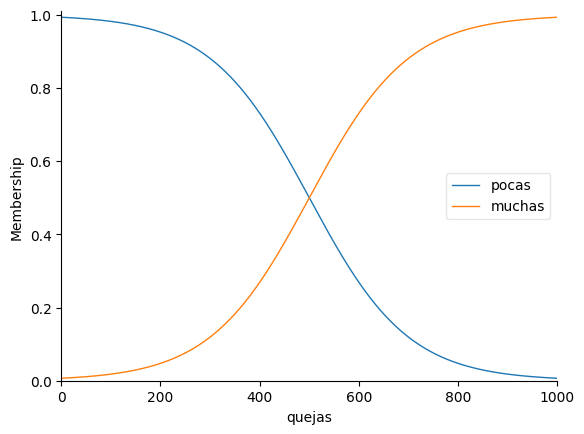

In [7]:
# Cantidad de quejas
# Universos de discursos y la fuzzificación de las variables
quejas = ctrl.Antecedent(np.arange(0, 1001, 1), 'quejas')
quejas['pocas'] = fuzz.sigmf(quejas.universe, 500, -0.01)
quejas['muchas'] = fuzz.sigmf(quejas.universe, 500, 0.01)
quejas.view() 


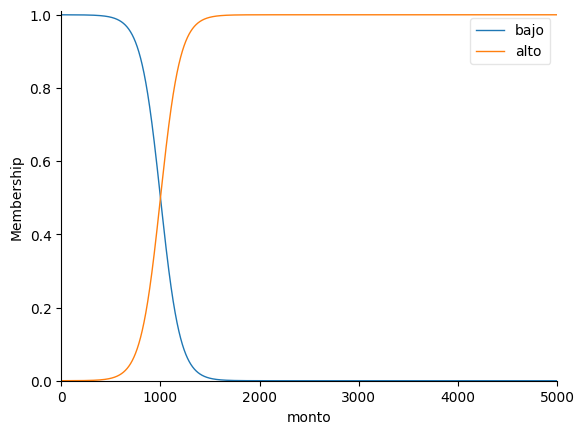

In [8]:
# Monto de compras
# Universo de discurso y fuzzificaci[on de las variables
monto = ctrl.Antecedent(np.arange(0, 5001, 1), 'monto')
monto['bajo'] = fuzz.sigmf(monto.universe, 1000, -0.01)
monto['alto'] = fuzz.sigmf(monto.universe, 1000, 0.01)
monto.view()

# 2. Declarar los antecedentes para el SIB TSK

In [9]:
quejas = np.arange(0, 1001, 1)
quejas_pocas = fuzz.sigmf(quejas, 500, -0.01)
quejas_muchas = fuzz.sigmf(quejas, 500, 0.01)

monto = np.arange(0, 5001, 1)
monto_bajo = fuzz.sigmf(monto, 1000, -0.01)
monto_alto = fuzz.sigmf(monto, 1000, 0.01)

# 3. Obtener las funciones afines del consecuente

In [10]:
l1 = linregress([0, 500], [0, 20])
l2 = linregress([500, 1000], [20, 250])
l3 = linregress([150, 1000], [300, 90])
l4 = linregress([1000, 5000], [90, 0])

m1 = l1.slope
b1 = l1.intercept

m2 = l2.slope
b2 = l2.intercept

m3 = l3.slope
b3 = l3.intercept

m4 = l4.slope
b4 = l4.intercept

In [11]:
def p13 (q, m):
    return m1*q + b1 + m3*m + b3 

def p14 (q, m):
    return m1*q + b1 + m4*m + b4

def p23 (q, m):
    return m2*q + b2 + m3*m + b3

def p24 (q, m):
    return m2*q + b2 + m4*m + b4

# 4. Crear la base de conocimientos

In [12]:
def regla_1 (q, m):
    mu1 = min(fuzz.interp_membership(quejas, quejas_pocas, q), fuzz.interp_membership(monto, monto_bajo, m))
    return mu1

def regla_2 (q, m):
    mu2 = min(fuzz.interp_membership(quejas, quejas_pocas, q), fuzz.interp_membership(monto, monto_alto, m))
    return mu2

def regla_3 (q, m):
    mu3 = min(fuzz.interp_membership(quejas, quejas_muchas, q), fuzz.interp_membership(monto, monto_bajo, m))
    return mu3

def regla_4 (q, m):
    mu4 = min(fuzz.interp_membership(quejas, quejas_muchas, q), fuzz.interp_membership(monto, monto_alto, m))
    return mu4

# 5. Construir el defuzzificador

In [13]:
def defuzzificador (q, m):
    r_1 = p13(q, m)
    r_2 = p14(q, m)
    r_3 = p23(q, m)
    r_4 = p24(q, m)

    mu1 = regla_1(q, m)
    mu2 = regla_2(q, m)
    mu3 = regla_3(q, m)
    mu4 = regla_4(q, m)

    num = mu1*r_1 + mu2*r_2 + mu3*r_3 + mu4*r_4
    den = mu1 + mu2 + mu3 + mu4
    return num/den

In [14]:
defuzzificador(200, 300)
# Podemos perder 264 cleintes

np.float64(264.5759037601858)